Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

### 2.Read dataset

In [24]:
df = pd.read_csv("Bike-dataset.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 3.Check missing values and if there are any dublicate rows or not.

In [8]:
df.duplicated().value_counts()

False    10886
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

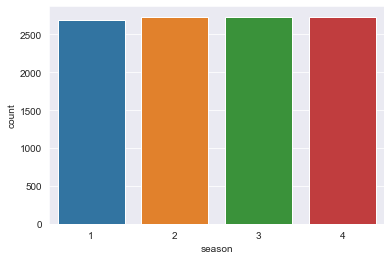

In [12]:
import seaborn as sns
#season
sns.countplot(x="season", data=df);


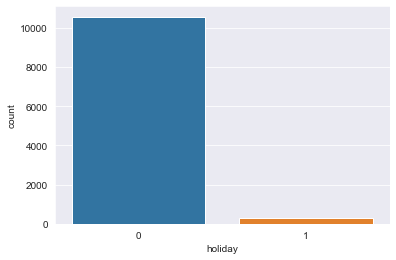

In [14]:
# is_holiday
sns.countplot(x="holiday", data=df);

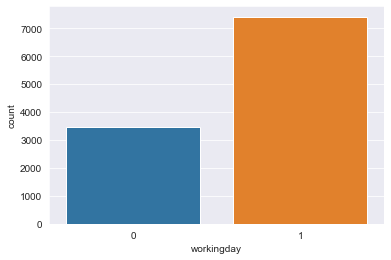

In [17]:
# is_weekend
sns.countplot(x="workingday", data=df);

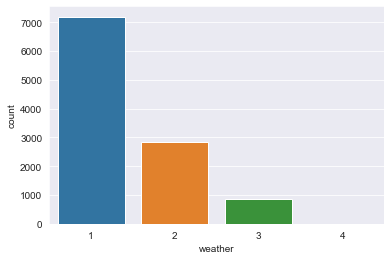

In [15]:
# weather_code
sns.countplot(x="weather", data=df);

### 5.Look at the data type of each variable, transform `timestamp` in time, and set it as index.

In [20]:
df["datetime"][0]

'2011-01-01 00:00:00'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df

In [28]:
df.datetime = pd.to_datetime(df.datetime)
df.set_index("datetime",inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [ ]:
# df["day_of_week"] = df.index.weekday.astype("int64")

In [29]:
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["hour"] = df.index.hour

df["year-month"] = df.index.strftime("%Y-%m")
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_month,day_of_week,hour,year-month
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2,2011-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3,2011-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4,2011-01


In [30]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day_of_month', 'day_of_week', 'hour', 'year-month'],
      dtype='object')

In [32]:
df.reindex(  ['year',
              'month', 
              'day_of_month', 
              'day_of_week', 
              'hour', 
              'year-month',
              'season', 
              'holiday',
              'workingday',
              'weather',
              'temp', 
              'atemp',
              'humidity', 
              'windspeed', 
              'casual', 
              'registered',
              'count'
              ] , axis=1)

,year,month,day_of_month,day_of_week,hour,year-month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011,1,1,5,0,2011-01,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,2011,1,1,5,1,2011-01,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,2011,1,1,5,2,2011-01,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,2011,1,1,5,3,2011-01,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,2011,1,1,5,4,2011-01,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012,12,19,2,19,2012-12,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,2012,12,19,2,20,2012-12,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,2012,12,19,2,21,2012-12,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


### 7.Visualize the correlation with a heatmap

In [33]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_month,day_of_week,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,-0.084427,0.380540


<AxesSubplot:>

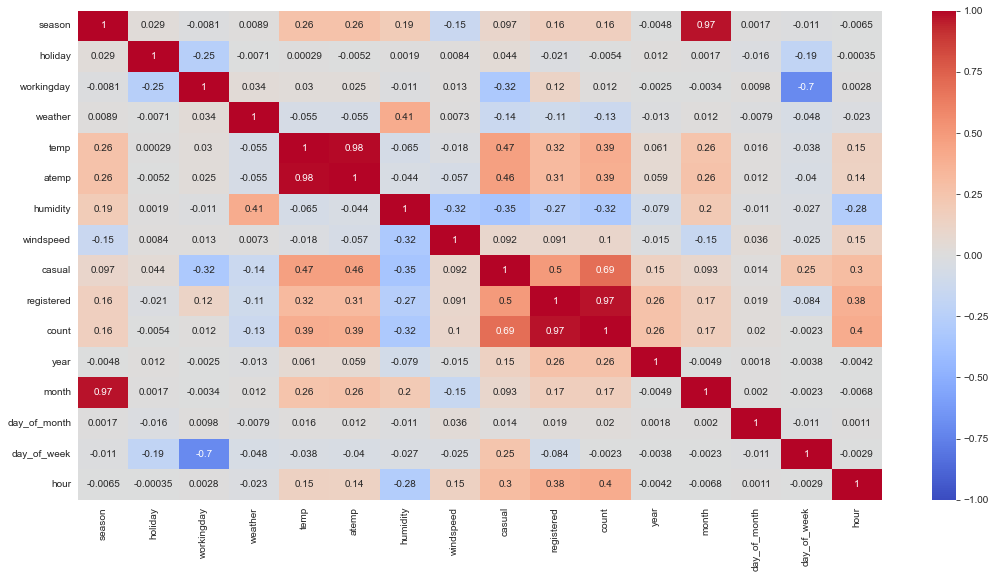

In [36]:
# for all variables 
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), cmap="coolwarm", vmax=1.0,vmin=-1.0, annot=True)

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:>

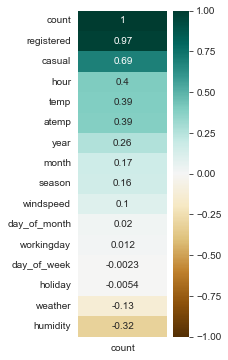

In [37]:
# for the target variable
plt.figure(figsize=(2,6))
sns.heatmap(df.corr()[["count"]].sort_values(by="count", ascending=False), annot=True, cmap='BrBG', vmin=-1)

### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

<Figure size 1152x648 with 0 Axes>

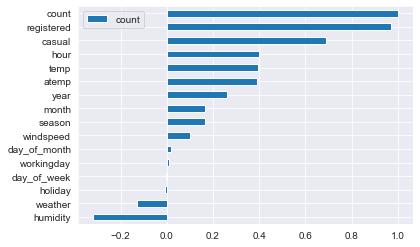

In [41]:
plt.figure(figsize=(16,9))
df.corr()[["count"]].sort_values(by="count", ascending=True).plot.barh()

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='datetime', ylabel='count'>

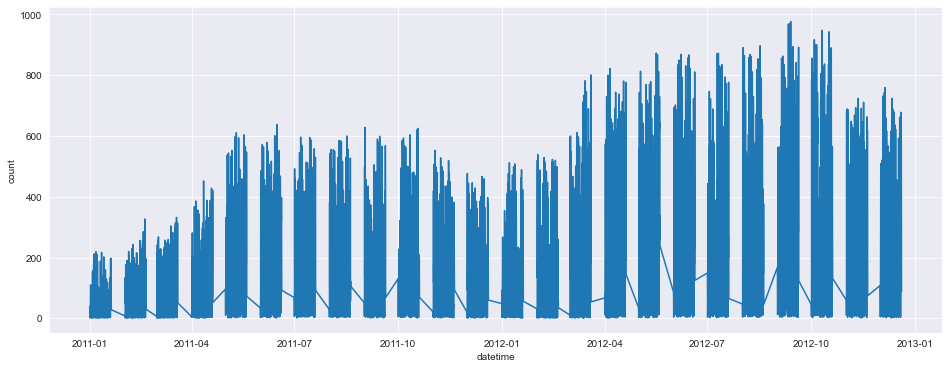

In [39]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df.index, y="count", data=df)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [47]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day_of_month', 'day_of_week', 'hour', 'year-month'],
      dtype='object')

In [45]:
df_sum = pd.DataFrame(df.groupby('year-month').cnt.sum())

In [46]:
# with lineplot
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month", y="count", data=df_sum)
plt.xticks(rotation=90);


ValueError: Could not interpret value `year-month` for parameter `x`

<Figure size 1440x360 with 0 Axes>

In [ ]:
# with lineplot
plt.figure(figsize=(12,5))
sns.lineplot(x="month", y="cnt", data=df)

In [ ]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x="month", y="cnt", data=df)


In [ ]:
# with barplot
plt.figure(figsize=(15,5))
sns.barplot(x="month", y="cnt", data=df)

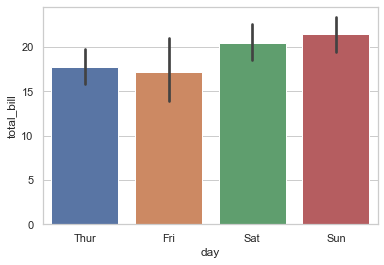

In [50]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [52]:
sns.__version__

'0.11.2'

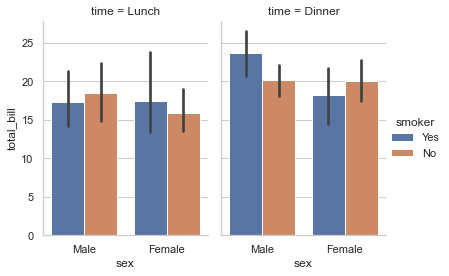

In [49]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

### 11.Plot bike shares by hours on (holidays, weekend, season)

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday")

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15,6))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season")

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x="hour", y="cnt", data=df, hue="is_holiday");


In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


In [ ]:
# with pointplot 
plt.figure(figsize=(16,9))
plt.subplot(4,1,1)
sns.pointplot(df.hour, df.cnt);
plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);
plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);
plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);

In [ ]:
# with pointplot alternative way
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (20,15))

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[1])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[2])

sns.pointplot(data = df, x = "hour", y = "cnt", hue = "season", ax = ax[3])

plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [ ]:
# with barplot
plt.figure(figsize=(7,3.8))

sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_holiday")

plt.show()

In [ ]:
# with pointplot
fig , ax = plt.subplots(2,1, figsize=(16,9))

sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[1], hue="season")

### 13.Plot bike shares by day of month

In [ ]:
#with lineplot

day_of_month = df.groupby('day_of_month')[['cnt']].mean().astype('int').T  
display(day_of_month)

plt.figure(figsize=(15,6))

sns.lineplot(data = df, x = "day_of_month", y = "cnt", )

plt.show()

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

In [ ]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt",estimator=np.mean)

In [ ]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt")

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
df["is_weekend"].value_counts()

In [ ]:
# pie chart
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(df.is_weekend.value_counts(),
      labels=["weekday","weekend"],
       labeldistance=0.3,
        autopct="%.1f%%");

In [ ]:
# with countplot

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()

In [ ]:
bölüm = df.is_weekend.value_counts().sum()/100
plt.figure(figsize=(7,6))
sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/bölüm:.3}-{value}", ha="center", va="bottom")

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

### 16.Plot the distribution of weather code by seasons

In [ ]:

# with countplot
sns.countplot(x="weather_code", data=df)

In [ ]:
# with catplot
sns.catplot(data = df, x = "weather_code", col="season", kind="count")

### 17.Visulaize all the continuous variables with histogram and scatterplot

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))


sns.histplot(data=df, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)

In [ ]:
# matplotlip hist
fig,axes=plt.subplots(2,2, figsize=(10,10))
axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#FF5500')
axes[0,0].set_title(" t1")
axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color='#00BBFF')
axes[0,1].set_title("t2")
axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color='#00AA55')
axes[1,0].set_title(" windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#FFFFFF')
axes[1,1].set_title("humidity")

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")
plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");